# SVM Classifier

In [1]:
#importing all libraries
import numpy as ny
import pandas as pa
import sklearn.datasets
import seaborn as sb
from sklearn import svm
%matplotlib inline
import matplotlib.pyplot as pt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
#loading of data
func= load_iris()

1. Train the model on 80% of data set
2. split the entire data set in 20% test and 80% train sets

In [32]:
#splitting of data(80% train and 20% test)
x=func.data
y=func.target
A_train,A_test,B_train,B_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
#Loading the Support vector machine model
a= svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=42)
a.fit(A_train,B_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

1. By using Cross-Validation, we are able to get more metrics and draw important conclusion both about our algorithm and our data.
2. Helps in finding best parameters

In [34]:
#Performing 10 fold cross validation on train data and calculating the mean
val= cross_val_score(a,A_train,B_train,cv=10)
val.mean()

0.9583333333333333

1. Consider a value of c from c_value set
2. Train the model on 80% of train data
3. For each value of c the model gives the accuracy scores
4. All the values of c and accuracies are stored in data frame and printed as below.

In [35]:
#Finding accuracy for different values of C
C_value=[0.1,0.5,1,2,5,10,20,50]
result_list = []
for i in C_value:
    b=svm.SVC(C=i, kernel='linear', random_state=42)
    b.fit(A_train,B_train)
    val= cross_val_score(b,A_train,B_train,cv=10)
    result=val.mean()
    result_list.append(val.mean())
df= pa.DataFrame(result_list,C_value,columns = ['Accuracy scores'])
df = df.rename_axis('C_value')
df

,Accuracy scores
C_value,
0.1,0.958333
0.5,0.958333
1.0,0.958333
2.0,0.958333
5.0,0.958333
10.0,0.950000
20.0,0.933333
50.0,0.933333


Text(0, 0.5, 'Accuracy')

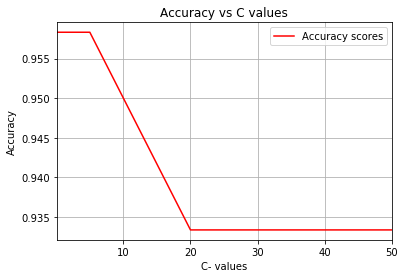

In [36]:
#Plotting graph for above tabular data
df.plot(color='red')
pt.grid()
pt.title('Accuracy vs C values')
pt.xlabel('C- values')
pt.ylabel('Accuracy')

In [37]:
b=svm.SVC(C=5, kernel='linear', random_state=42)
b.fit(A_train,B_train)
test_acc=accuracy_score(B_test,b.predict(A_test))
print(test_acc)

0.9666666666666667


The choice of kernel and proper tuning of SVM hyperparameters are core factors, contributing to SVM accuracy
1. As the value of c increase there is decrease in the accuracy of the model
2. It also depends on splitting the train and test data if more test data is taken then the accuracy of test data is improved.The predictions became stable with increasing size of training sets.
